# Before you begin


1.   Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one.
2.   [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.
3.   [Enable BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) APIs for the project.


### Provide your credentials to the runtime

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Optional: Enable data table display

Colab includes the ``google.colab.data_table`` package that can be used to display large pandas dataframes as an interactive data table.
It can be enabled with:

In [0]:
%load_ext google.colab.data_table

If you would prefer to return to the classic Pandas dataframe display, you can disable this by running:
```python
%unload_ext google.colab.data_table
```

# Use BigQuery via magics

The `google.cloud.bigquery` library also includes a magic command which runs a query and either displays the result or saves it to a variable as a `DataFrame`.

## as shown below, if after project if "df" is written, it turns the query into a pandas dataframe

In [0]:
# %%bigquery --project yourprojectid

%%bigquery --project isentropic-road-260315 df

     SELECT
        *
        FROM
        `bigquery-public-data.ml_datasets.census_adult_income`

In [0]:
# this is for the final print of results
table= "vargas_data_studies_US.census"

# Useful links for classification

- a very cool one https://developer.ibm.com/tutorials/learn-classification-algorithms-using-python-and-scikit-learn/

- https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2
- https://developer.ibm.com/tutorials/learn-classification-algorithms-using-python-and-scikit-learn/
- https://github.com/albertovpd/datamad1019/blob/lab-supervised-learning/module-3/lab-supervised-learning/your-code/main.ipynb
- https://github.com/albertovpd/kaggle-competitions

# Save output in a variable `df`

%%bigquery --project yourprojectid df 
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.samples.gsod`

In [5]:
df.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,74141,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,178215,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,86958,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,176012,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K


In [6]:
df.dtypes

age                   int64
workclass            object
functional_weight     int64
education            object
education_num         int64
marital_status       object
occupation           object
relationship         object
race                 object
sex                  object
capital_gain          int64
capital_loss          int64
hours_per_week        int64
native_country       object
income_bracket       object
dtype: object

In [0]:
# we need to get rid of all object types
# first, evaluate what columns are strongly correlated

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

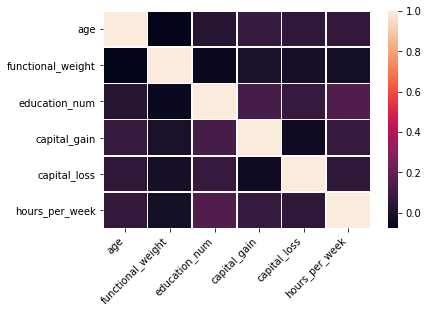

In [9]:
# IMP! _get_numeric_data() is awesome

corr = df._get_numeric_data().corr()
# ------
ax = sns.heatmap(
    corr, 
    linewidths=.5
    
    #vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    #square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc={'figure.figsize':(15,15)})
ax

In [0]:
# remove column collinearity
# # Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap 
# again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep 
# in mind when two columns have high collinearity, you only need to remove one of them but not both.

In [11]:
# handle missing values
df.isna().sum() # the less the better

age                  0
workclass            0
functional_weight    0
education            0
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income_bracket       0
dtype: int64

In [0]:
# TURNING CATEGORICAL DATA TO NUMERICAL

In [13]:
df.dtypes

age                   int64
workclass            object
functional_weight     int64
education            object
education_num         int64
marital_status       object
occupation           object
relationship         object
race                 object
sex                  object
capital_gain          int64
capital_loss          int64
hours_per_week        int64
native_country       object
income_bracket       object
dtype: object

In [14]:
for e in df.select_dtypes(include=['object']):
      display(e,df[e].unique())

'workclass'

array([' Private', ' Self-emp-inc', ' Local-gov', ' ?',
       ' Self-emp-not-inc', ' Federal-gov', ' State-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

'education'

array([' 9th', ' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th',
       ' 7th-8th', ' HS-grad', ' Masters', ' Assoc-voc', ' Bachelors',
       ' Doctorate', ' Preschool', ' Assoc-acdm', ' Prof-school',
       ' Some-college'], dtype=object)

'marital_status'

array([' Married-civ-spouse', ' Married-AF-spouse', ' Never-married',
       ' Divorced', ' Separated', ' Married-spouse-absent', ' Widowed'],
      dtype=object)

'occupation'

array([' Other-service', ' Exec-managerial', ' Machine-op-inspct',
       ' Tech-support', ' Adm-clerical', ' ?', ' Farming-fishing',
       ' Priv-house-serv', ' Sales', ' Protective-serv',
       ' Transport-moving', ' Handlers-cleaners', ' Craft-repair',
       ' Prof-specialty', ' Armed-Forces'], dtype=object)

'relationship'

array([' Wife', ' Husband', ' Own-child', ' Unmarried', ' Not-in-family',
       ' Other-relative'], dtype=object)

'race'

array([' Black', ' Asian-Pac-Islander', ' White', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

'sex'

array([' Female', ' Male'], dtype=object)

'native_country'

array([' United-States', ' Portugal', ' Yugoslavia', ' Hong', ' Haiti',
       ' Dominican-Republic', ' Mexico', ' Guatemala', ' Cuba', ' ?',
       ' Japan', ' Laos', ' Philippines', ' Germany', ' Italy',
       ' El-Salvador', ' Vietnam', ' Canada', ' Puerto-Rico', ' Honduras',
       ' Jamaica', ' South', ' Trinadad&Tobago', ' Greece', ' Peru',
       ' Iran', ' Columbia', ' Scotland', ' China', ' Nicaragua',
       ' England', ' Poland', ' Outlying-US(Guam-USVI-etc)', ' Taiwan',
       ' Hungary', ' India', ' Ecuador', ' Thailand', ' Cambodia',
       ' France', ' Ireland', ' Holand-Netherlands'], dtype=object)

'income_bracket'

array([' <=50K', ' >50K'], dtype=object)

In [0]:

# # convert to number based on frequency (high frequency - high number), this worked fine in the classification problem
# for e in df.select_dtypes(include=['object']):
#   labels = df[e].value_counts(ascending=True).index.tolist()
#   codes = range(1,len(labels)+1)
#   df[e].replace(labels,codes,inplace=True)


In [15]:
# convert from categorical to numerical with sklearn
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric

for e in df.select_dtypes(include=['object']):
  df[e]=le.fit_transform(df[e])
#display the initial records
df.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,4,297847,6,5,2,8,5,2,0,3411,0,34,39,0
1,72,4,74141,6,5,2,4,5,1,0,0,0,48,39,1
2,45,4,178215,6,5,2,7,5,4,0,0,0,40,39,1
3,31,4,86958,6,5,2,4,5,4,0,0,0,40,39,0
4,55,4,176012,6,5,2,13,5,4,0,0,0,23,39,0


In [16]:
df.dtypes

age                  int64
workclass            int64
functional_weight    int64
education            int64
education_num        int64
marital_status       int64
occupation           int64
relationship         int64
race                 int64
sex                  int64
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country       int64
income_bracket       int64
dtype: object

In [0]:
# awesome, all is numerical now

In [18]:
df.shape

(32561, 15)

In [19]:
# functions to remove outliers

# OUTLIERS OUT TIME

Q1 = df.quantile(0.1)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1
print(IQR)

age                      36.0
workclass                 4.0
functional_weight    263338.0
education                10.0
education_num             6.0
marital_status            4.0
occupation               11.0
relationship              4.0
race                      2.0
sex                       1.0
capital_gain              0.0
capital_loss              0.0
hours_per_week           31.0
native_country            3.0
income_bracket            1.0
dtype: float64


In [20]:
# removing outliers with The interquartile range (IQR)
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(25647, 15)

In [0]:
# MACHINE LEARNING TIME

In [22]:
# split dataframe
df.columns

Index(['age', 'workclass', 'functional_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_bracket'],
      dtype='object')

In [23]:
list(df.columns)

['age',
 'workclass',
 'functional_weight',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income_bracket']

In [0]:
y=df['income_bracket']
X=df[['age', 'workclass', 'functional_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]

In [0]:
# normalize and standarize the stuff
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# printing metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
# dividing train/test/split
from sklearn.model_selection import train_test_split
# ml algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
# # standarizing
#scaler = MinMaxScaler()
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)

In [0]:
algo_dict={
          "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train),
           "Gaussian Naive Bayes": GaussianNB().fit(X_train, y_train),
           "Logistic Regression": LogisticRegression().fit(X_train, y_train),
           "Decision Tree": DecisionTreeClassifier().fit(X_train, y_train),
           "Linear Discriminant Analysis": LinearDiscriminantAnalysis().fit(X_train, y_train),
           "Support Vector Machine": SVC().fit(X_train, y_train),
           "Decision Tree Clasifier": DecisionTreeClassifier().fit(X_train, y_train),
           #"Nu Support Vector Machine": NuSVC(probability=True),
           "Random Forest Classifier": RandomForestClassifier().fit(X_train, y_train), 
           "Ada Boost Classifier": AdaBoostClassifier().fit(X_train, y_train),
           "Gradient Boosting Classifier": GradientBoostingClassifier().fit(X_train, y_train),  
           "Linear Discriminant Analysis": LinearDiscriminantAnalysis().fit(X_train, y_train)
           
      
          }

In [0]:

# funtion to plot metrics
def results_algo(dictio,X_test,y_test):
    
    '''it receives a dicitonary with name and 
    features of the model '''
    target_names=["income_bracket"]
    print(" - Precision – Accuracy of positive predictions.")
    print(" - Precision = TP/(TP + FP)")
    print("")
    print(" - Recall: Fraction of positives that were correctly identified.")
    print(" - Recall = TP/(TP+FN)")
    print("")
    print(" - F1 score – What percent of positive predictions were correct?","\n",
          "The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.","\n", 
          "Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation.","\n",
          "As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.")
    print(" - F1 Score = 2*(Recall * Precision) / (Recall + Precision)")
    print("")
    print(" - Accuracy Score: The set of labels predicted for a sample must exactly match the corresponding set of labels in y_true .")
    print("")
    print("---------------")

    for n,e in dictio.items():
        score=e.score(X_test,y_test)
        prediction = e.predict(X_test)
        print("\n",n,"\n")
        print(table)
        #print("Mean Absolute Error:             ",mean_absolute_error(y_test, prediction)) 
        #print("Root mean Squared Error is:      ",mean_squared_error(y_test, prediction)**0.5)
        #print("R2 square value:                 ",r2_score(y_test, prediction))
        print("Accuracy Score:                  ",accuracy_score(y_test, prediction))
        #is the same than accuracy score print("Model Score in test:             ",e.fit(X_train, y_train).score(X_test, y_test))
        print("Classification report:")
        print(classification_report(y_test, prediction))
        print("")
        svc_disp = plot_roc_curve(e, X_test, y_test)
        plt.rcParams["figure.figsize"] = [8,8]
        plt.show()
        print("---------------")

# plt.figure(figsize= (6, 6))
# plt.title(n)a
# sns.regplot(prediction, y_test)
# plt.xlabel('Predicted Income Bracket')
# plt.ylabel('Actual Income Bracket')
#  plt.show()
        


 - Precision – Accuracy of positive predictions.
 - Precision = TP/(TP + FP)

 - Recall: Fraction of positives that were correctly identified.
 - Recall = TP/(TP+FN)

 - F1 score – What percent of positive predictions were correct? 
 The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 
 Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. 
 As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
 - F1 Score = 2*(Recall * Precision) / (Recall + Precision)

 - Accuracy Score: The set of labels predicted for a sample must exactly match the corresponding set of labels in y_true .

---------------

 KNeighbors Classifier 

vargas_data_studies_US.census
Accuracy Score:                   0.8348927875243665
Classification report:
              precision    recall  f1-score   support

           0       0

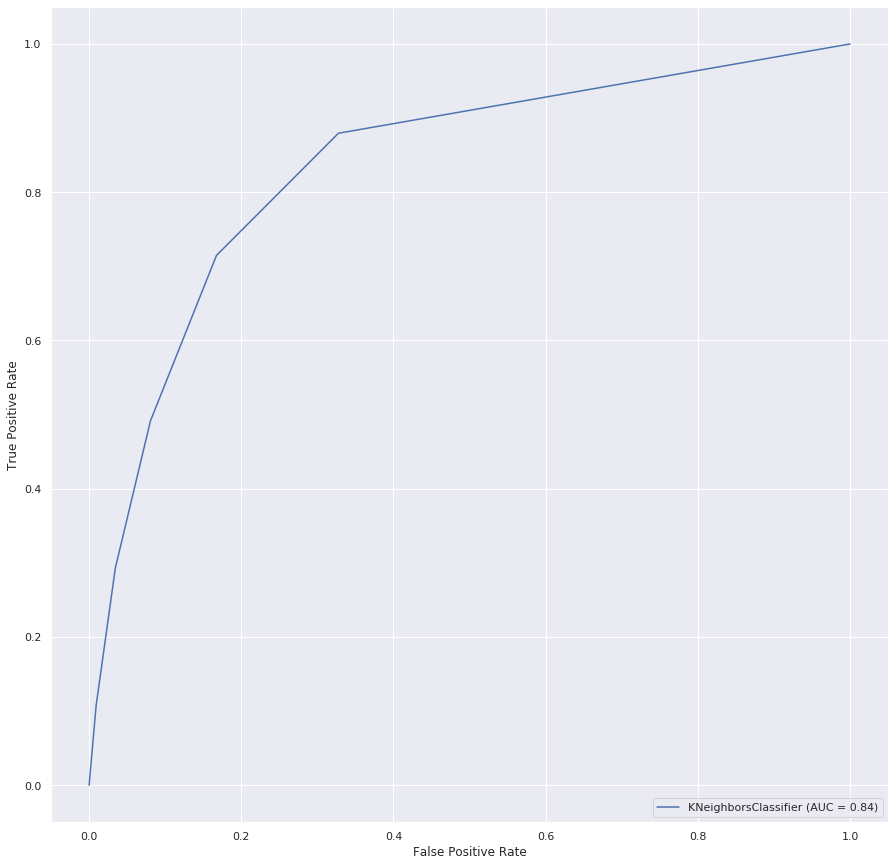

---------------

 Gaussian Naive Bayes 

vargas_data_studies_US.census
Accuracy Score:                   0.7842105263157895
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      4117
           1       0.47      0.72      0.57      1013

    accuracy                           0.78      5130
   macro avg       0.69      0.76      0.71      5130
weighted avg       0.83      0.78      0.80      5130




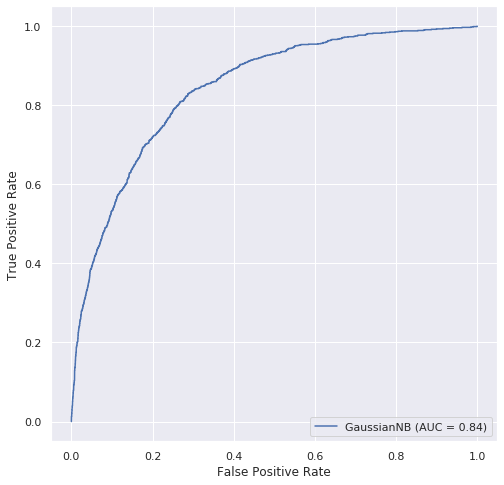

---------------

 Logistic Regression 

vargas_data_studies_US.census
Accuracy Score:                   0.8249512670565302
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4117
           1       0.63      0.28      0.39      1013

    accuracy                           0.82      5130
   macro avg       0.74      0.62      0.64      5130
weighted avg       0.80      0.82      0.80      5130




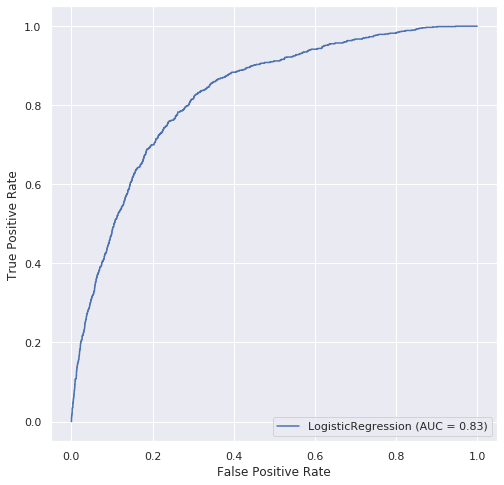

---------------

 Decision Tree 

vargas_data_studies_US.census
Accuracy Score:                   0.8038986354775829
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4117
           1       0.50      0.49      0.50      1013

    accuracy                           0.80      5130
   macro avg       0.69      0.69      0.69      5130
weighted avg       0.80      0.80      0.80      5130




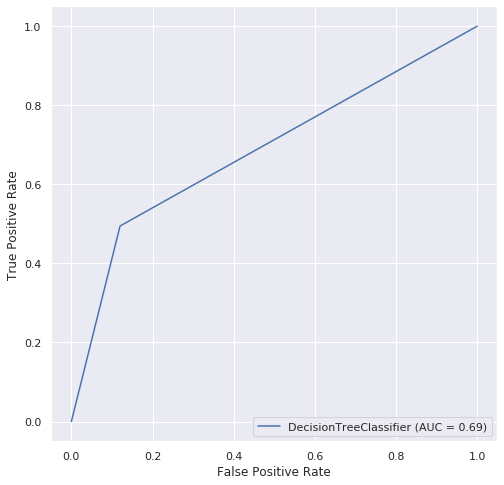

---------------

 Linear Discriminant Analysis 

vargas_data_studies_US.census
Accuracy Score:                   0.8267056530214425
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4117
           1       0.63      0.29      0.40      1013

    accuracy                           0.83      5130
   macro avg       0.74      0.62      0.65      5130
weighted avg       0.80      0.83      0.80      5130




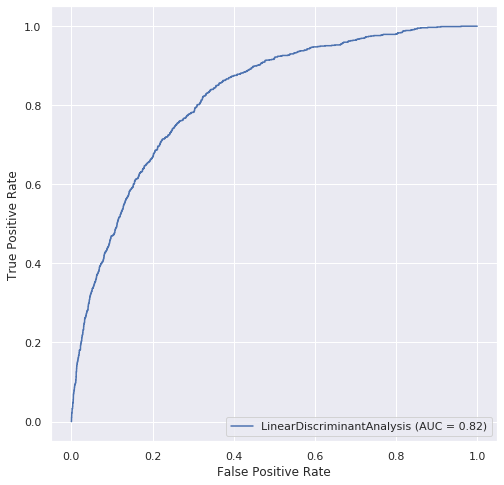

---------------

 Support Vector Machine 

vargas_data_studies_US.census
Accuracy Score:                   0.8485380116959065
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4117
           1       0.72      0.38      0.50      1013

    accuracy                           0.85      5130
   macro avg       0.79      0.67      0.70      5130
weighted avg       0.84      0.85      0.83      5130




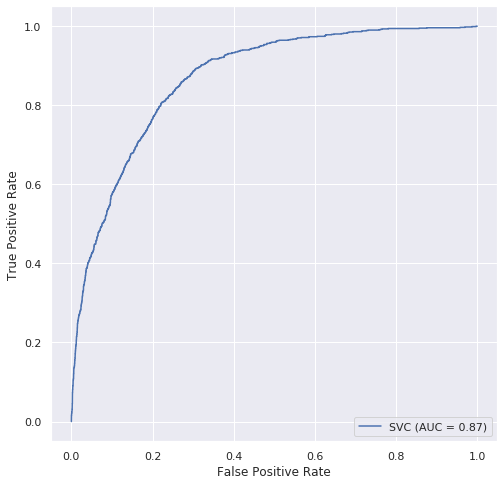

---------------

 Decision Tree Clasifier 

vargas_data_studies_US.census
Accuracy Score:                   0.8033138401559454
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4117
           1       0.50      0.49      0.49      1013

    accuracy                           0.80      5130
   macro avg       0.69      0.68      0.69      5130
weighted avg       0.80      0.80      0.80      5130




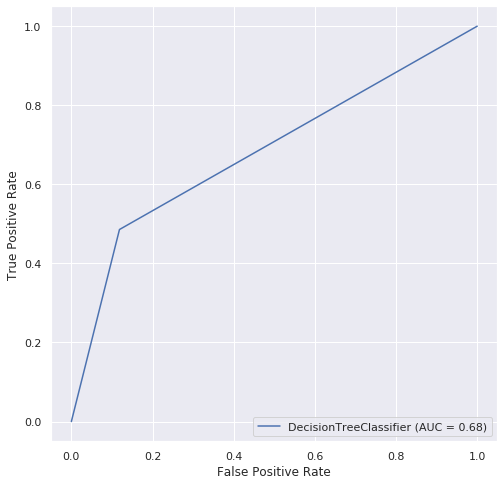

---------------

 Random Forest Classifier 

vargas_data_studies_US.census
Accuracy Score:                   0.8442495126705652
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4117
           1       0.64      0.49      0.55      1013

    accuracy                           0.84      5130
   macro avg       0.76      0.71      0.73      5130
weighted avg       0.83      0.84      0.84      5130




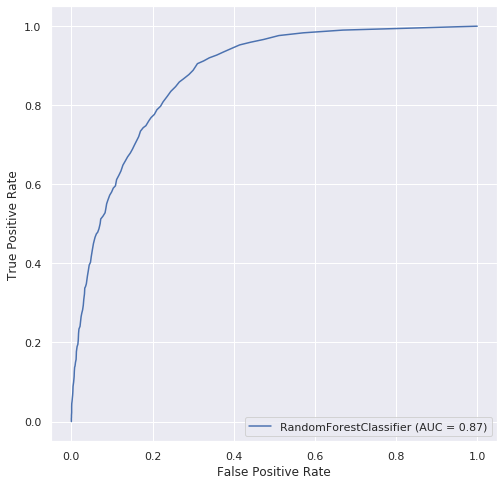

---------------

 Ada Boost Classifier 

vargas_data_studies_US.census
Accuracy Score:                   0.8526315789473684
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4117
           1       0.68      0.47      0.56      1013

    accuracy                           0.85      5130
   macro avg       0.78      0.71      0.73      5130
weighted avg       0.84      0.85      0.84      5130




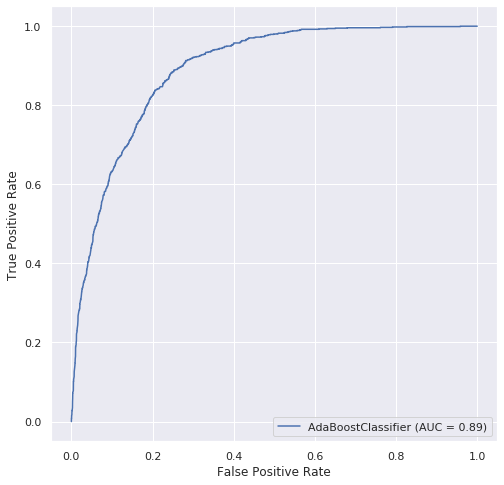

---------------

 Gradient Boosting Classifier 

vargas_data_studies_US.census
Accuracy Score:                   0.8539961013645224
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4117
           1       0.70      0.46      0.55      1013

    accuracy                           0.85      5130
   macro avg       0.79      0.70      0.73      5130
weighted avg       0.84      0.85      0.84      5130




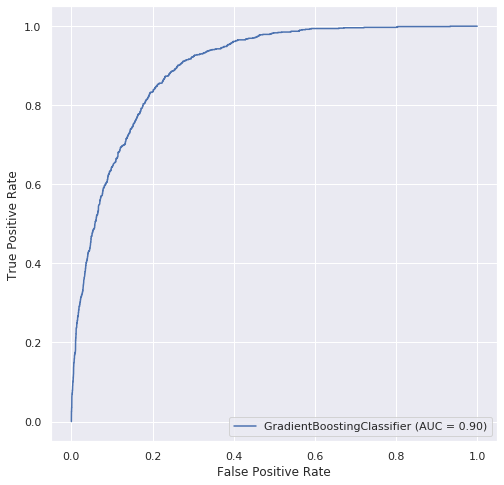

---------------


In [30]:
results_algo(algo_dict,X_test,y_test)

In [0]:
#-- Hyperparameter optimisation --
#Now we take the best model and work with it
# (it can take a lot of time)

In [0]:
from sklearn.model_selection import GridSearchCV
# parameters to tune
n_estimators = [100, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)
# last best model
gb = GradientBoostingClassifier()
# gidsearch
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid)
best_model = grid_search.fit(X_train, y_train)
# results
print(round(best_model.score(X_test, y_test),2))
print(best_model.best_params_)
svc_disp = plot_roc_curve(e, X_test, y_test)
plt.rcParams["figure.figsize"] = [8,8]
plt.show()